<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Get-the-information-from-the-QUOTEAPI" data-toc-modified-id="Get-the-information-from-the-QUOTEAPI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the information from the QUOTEAPI</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Translating" data-toc-modified-id="Translating-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Translating</a></span></li><li><span><a href="#Stop-words" data-toc-modified-id="Stop-words-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop words</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sentiment Analysis</a></span></li></ul></div>

## Libraries

In [1]:
import pandas as pd
import requests
#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

from langdetect import detect
import seaborn as sns

/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Get the information from the QUOTEAPI 

In [2]:
url = ("http://127.0.0.1:5000/Data")

In [3]:
all_aut =  requests.get(url)
all_aut.status_code

200

In [4]:
data = all_aut.json()

In [5]:
df = pd.DataFrame(data)
df.head()

,Author,Category,Gender,Quote
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o..."
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it..."
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...


## Tokenization 

In [6]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [7]:
df["Quote_tok"] = df["Quote"].apply(tokenize)

In [8]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,"[I, believe, that, thirty, million, of, these,..."
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,"[Biology, is, the, study, of, the, complex, th..."
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...","[If, physics, and, biology, one, day, meet, an..."
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...","[By, life, we, mean, a, thing, that, can, nour..."
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,"[Everything, that, human, beings, or, living, ..."


In [9]:
df['Quote_tok'] = df['Quote_tok'].apply(lambda x: " ".join(x))
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics and biology one day meet and one of...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life we mean a thing that can nourish itsel...
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything that human beings or living animals...


## Translating

In [10]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [11]:
df['Quote_tok'] = df["Quote_tok"].apply(intoEnglish)

In [12]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe that thirty million of these animalc...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology is the study of the complex things in ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics and biology one day meet and one of...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life we ​​mean a thing that can nourish its...
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything that human beings or living animals...


## Stop words

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anagarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/anagarcia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
df["Quote_tok"] = df["Quote_tok"].apply(lambda x: x.split(" "))

In [17]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [18]:
df["Quote_tok"] = df["Quote_tok"].apply(stop_words)

In [19]:
df.head()

,Author,Category,Gender,Quote,Quote_tok
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe thirty million animalcules together ...
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology study complex things Universe Physics ...
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics biology one day meet one two swallo...
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life ​​mean thing nourish grow decay
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything human beings living animals done pr...


## Sentiment Analysis

In [20]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [21]:
df['SA'] = df["Quote_tok"].apply(sentimentAnalysis)
df

,Author,Category,Gender,Quote,Quote_tok,SA
0,Antonie van Leeuwenhoek,science,M,I believe that thirty million of these animalc...,I believe thirty million animalcules together ...,0.0000
1,Richard Dawkins,science,M,Biology is the study of the complex things in ...,Biology study complex things Universe Physics ...,0.0000
2,J. B. S. Haldane,science,M,"If physics and biology one day meet, and one o...",If physics biology one day meet one two swallo...,0.0000
3,Aristotle,science,M,"By �life,� we mean a thing that can nourish it...",By life ​​mean thing nourish grow decay,-0.4019
4,Har Gobind Khorana,science,M,Everything that human beings or living animals...,Everything human beings living animals done pr...,0.7964
...,...,...,...,...,...,...
179,Mary Wollstonecraft,philosophy,F,No deseo que las mujeres tengan poder sobre lo...,I want women power men,0.0772
180,Lou Andreas-Salom�,philosophy,F,No puedo vivir conforme a ejemplos ni voy a re...,I cannot live examples I ever represent exampl...,0.0000
181,Hannah Arendt,philosophy,F,No hay pensamientos peligrosos; el pensamiento...,There dangerous thoughts thought dangerous,-0.7351
182,Simone de Beauvoir,philosophy,F,"No se nace mujer, se llega a serlo","You born woman, become one",0.0000


In [22]:
df_sentimental = df.groupby(["Category"]).mean()

In [23]:
df_sentimental.reset_index()

,Category,SA
0,literature,0.055934
1,philosophy,0.142016
2,science,0.186021


In [24]:
df_group = df.groupby(['Category','Author'], as_index=False)['SA'].mean()
df_group

,Category,Author,SA
0,literature,Albert Camus,0.00000
1,literature,Aldous Huxley,-0.42150
2,literature,Charles Dickens,0.84020
3,literature,Charlotte Bront�,0.88340
4,literature,D. H. Lawrence,0.35920
...,...,...,...
117,science,Shinya Yamanaka,0.00000
118,science,Stan Ulam,0.34000
119,science,Stephen Jay Gould,0.36345
120,science,Susumu Ohno,0.81760


In [26]:
df_sentimental = df.groupby(["Author"]).mean()

In [27]:
df_sentimental.reset_index()

,Author,SA
0,Albert Camus,-0.680800
1,Anaxagoras,0.296000
2,Aristotle,0.646825
3,Baruch Spinoza,0.624900
4,Bertrand Russell,-0.083025
...,...,...
122,William Golding,0.128000
123,William Makepeace Thackeray,-0.025800
124,William Shakespeare,0.612400
125,Zora Neale Hurston,-0.680800


In [28]:
df2 = df.groupby(['Category','Gender'], as_index=False).mean()
df2

,Category,Gender,SA
0,literature,F,0.230853
1,literature,M,-0.001104
2,philosophy,F,0.160350
3,philosophy,M,0.136852
4,science,F,0.114700
5,science,M,0.192505


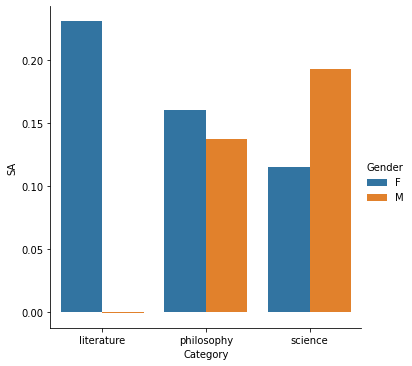

In [29]:
sns.catplot(x="Category", y="SA", hue="Gender", kind="bar", data=df2)